In [35]:
# Setup
import sympy as sym
import numpy as np
import scipy.optimize as opt

sym.init_printing()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Question 1 &mdash; Measuring $\pi$


<img style="float:right; max-width:380px;" src="assignment-1-diagram.png"/>
In this experiment, $\pi$ was determined experimentally by measuring the circumfrance and diamter of a circle. An accurate circle with four equispaced diameter was obtained by printing a computer generated graphic (see figure). The diameters and eights of the circumfrance were measued many times using a flexible tape-measure. Eights of a the circumfrance were measued between the diameter lines because aligning a flexible tape measure around the entire circumfrance is error-prone.
For both circumfrance and diameter, the mean was used as the best estimate, and the standard deviation error on the mean was used as the uncertainty.

Once the diameter and circumfrance were measued, pi was calculated using the formula $\pi = \frac{C}{d}$ where $C$ is the circumfrance, and $d$ is the diameter.

The error was propagated using the formula: $\sigma_\pi=\sqrt{(\frac{\partial \pi}{\partial C} \sigma_C)^2 + (\frac{\partial \pi}{\partial d} \sigma_d)^2}$

In [36]:
diameters = np.array([
    19.55,
    19.54,
    19.55,
    19.54,
    19.53,
    19.53,
    19.60,
    19.61,
    19.60,
    19.65,
    19.66,
    19.64,
])

# Measured eights of a circumfrance
eighths = np.array([
    7.70,
    7.72,
    7.76,
    7.65,
    7.63,
    7.71,
    7.72
])
circumfrances = 8*eighths

In [37]:


def mean_and_error_on_the_mean(datas):
    mean = datas.mean()
    std = datas.std(ddof=1)
    mean_err = std/sqrt(len(datas)-1)
    return mean, mean_err

diameter, diameter_err = mean_and_error_on_the_mean(diameters)
circumfrance, circumfrance_err = mean_and_error_on_the_mean(circumfrances)

circ, circ_d, diam, diam_d = sym.symbols('c sigma_c d sigma_d')

# Our expressions
pi = circ/diam
pi_d = sym.sqrt((sym.diff(pi, circ)*circ_d)**2+(sym.diff(pi, diam)*diam_d)**2)


subs = {
    circ: circumfrance,
    circ_d: circumfrance_err,
    diam: diameter,
    diam_d: diameter_err
}

pi_calc = pi.evalf(subs=subs)
pi_calc_d = pi_d.evalf(subs=subs)

print('Pi is measured to be: {: 0.3f} ± {:0.3f}'.format(pi_calc, pi_calc_d))

Pi is measured to be:  3.145 ± 0.008


The accepted value of $\pi$ to three decimal places is 3.142, which is well within the error margins.

## Question 2
*Propagate the uncertainty in measurement*

Define the function $f(x,y)=\log(\frac{x}{\sqrt{x^2+y^2}}) \sqrt{10+cos(x)}$ symbolically using *SymPy*.

There error of $f(x,y)$, $\sigma_f$ is given by $\sigma_f=\sqrt{(\frac{\partial f}{\partial x} \sigma_x)^2 + (\frac{\partial f}{\partial y} \sigma_y)^2}$

In [38]:
x, y, sigma_x, sigma_y = sym.symbols('x y sigma_x sigma_y')

F = sym.log(x/sym.sqrt(x**2+y**2))*sym.sqrt(10+sym.cos(x))

sigma_f = sym.sqrt((sym.diff(F, x)*sigma_x )**2 +
                   (sym.diff(F,y)*sigma_y)**2)


Now we can evaluate our function and calculate its error on the range of values below:

In [39]:
values = [
    {'x':1.0, 'sigma_x':0.2, 'y':2.3, 'sigma_y':0.1},
    {'x':1.2, 'sigma_x':0.1, 'y':3.0, 'sigma_y':.2},
    {'x':2.1, 'sigma_x':0.7, 'y':1.0, 'sigma_y':.7},
    {'x':3.2, 'sigma_x':0.4, 'y':4.1, 'sigma_y':0.6},
]

# calculate the values and errors on f
for subs in values:
    val = F.evalf(subs=subs)
    err = sigma_f.evalf(subs=subs)
    print( 
       ('f({x:.1f}±{sigma_x:.1f}, {y:.1f}±{sigma_y:.1f}) = '+
        '{val: 0.1f} ± {err:0.1f}').format(val=val, err=err, **subs)
    )

f(1.0±0.2, 2.3±0.1) = -3.0 ± 0.6
f(1.2±0.1, 3.0±0.2) = -3.2 ± 0.3
f(2.1±0.7, 1.0±0.7) = -0.3 ± 0.4
f(3.2±0.4, 4.1±0.6) = -1.5 ± 0.4


## Question 3


In [40]:
# near linear model y(x)=a+bx
# 

data = np.array([
    #  x,      y,  sigma_y
    [ 0.00,  4.92, 0.86],
    [ 0.53,  5.45, 1.19],
    [ 1.05,  5.89, 1.29],
    [ 1.58,  8.12, 0.12],
    [ 2.11,  9.20, 0.61],
    [ 2.63, 10.86, 0.62],
    [ 3.16, 10.33, 1.26],
    [ 3.68, 15.28, 1.42],
    [ 4.21, 13.80, 1.07],
    [ 4.74, 13.86, 0.44],
    [ 5.26, 14.57, 0.72],
    [ 5.79, 15.48, 0.65],
    [ 6.32, 17.91, 0.72],
    [ 6.84, 17.83, 0.65],
    [ 7.37, 21.25, 1.64],
    [ 7.89, 21.72, 0.59],
    [ 8.42, 21.80, 0.05],
    [ 8.95, 23.52, 1.45],
    [ 9.47, 25.47, 1.25],
    [10.00, 24.95, 0.05],
])

X = data[:,0]
Y = data[:,1]
Y_err = data[:,2]

A) Evaluate the mean, standard deviation, and error on the mean of Y

In [41]:
Y_mean  = Y.mean()
Y_stdev = Y.std(ddof=1)
Y_mean_err = Y_stdev/sqrt(len(Y)-1)

print('Y_mean  = {:.2f} ± {:.1f}'.format(Y_mean, Y_mean_err))
print('Y_stdev = {:.2f}'.format(Y_stdev))

Y_mean  = 15.11 ± 1.5
Y_stdev = 6.60


B) Fit the model

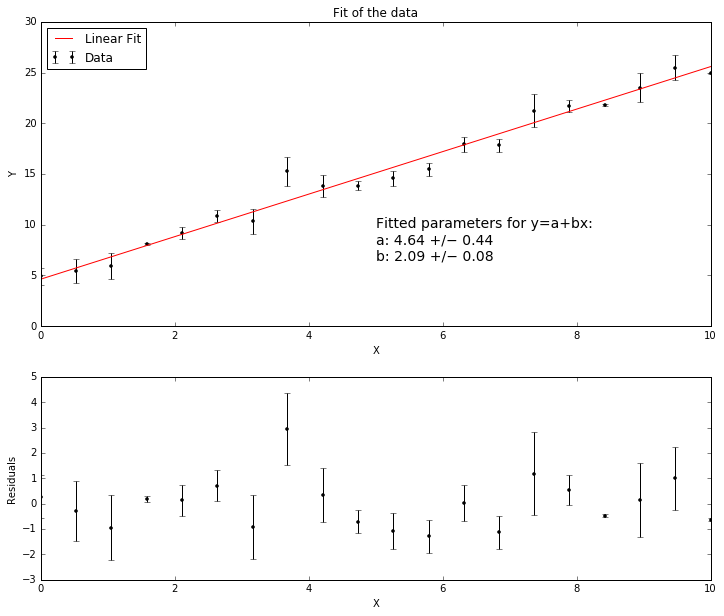

In [42]:
def model(x, a, b):
    return a+b*x

(a, b), pcov = opt.curve_fit(model, X, Y, (0,0), sigma=Y_mean_err)
pars_err = np.sqrt(np.diag(pcov))

matplotlib.rcParams['figure.figsize'] = (12, 10)
gs = matplotlib.gridspec.GridSpec(2, 1, height_ratios=[3, 2])

subplot(gs[0])
errorbar(X, Y, Y_err, fmt='k.', label='Data')
x = linspace(0, 10, 200)
plot(x, model(x, a, b), 'r-', label='Linear Fit')
#Create some text with the fit results to put into our plot
resultTxt = (
    "Fitted parameters for y=a+bx:\n"
    "a: {:.2f} +/− {:.2f}\n"
    "b: {:.2f} +/− {:.2f}\n"
).format(a,pars_err[0],b,pars_err[1])
text(X.mean(),Y.min() ,resultTxt , fontsize=14)
title('Fit of the data')
ylabel('Y')
xlabel('X')
legend(loc='best')

subplot(gs[1])
errorbar(X, Y-model(X, a, b), Y_err, fmt='k.')
xlabel('X')
ylabel('Residuals')
show()

C) Calculate the $\chi^2$ of this fit

In [43]:

chi_squared = sum(((Y-model(X, a, b))/Y_err)**2)
M = 2 # 2 parameters
N = len(Y)
n = N-M-1

print('''
The chi squared for this fit is {:.2f}
The number of degrees of freedum is {}
The chi squared over dof is {:.2f}
'''.format(chi_squared, n, chi_squared/n))


The chi squared for this fit is 272.51
The number of degrees of freedum is 17
The chi squared over dof is 16.03

